In [1]:
import torch
import numpy as np
from globalbiopak.linop import *
import matplotlib.pyplot as plt

# Input definition

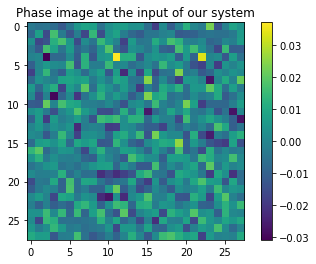

In [2]:
in_size = 28
phase_scale = 0.01

img = torch.randn(in_size, in_size)
in_field = torch.exp(1j * img * phase_scale)

plt.imshow(torch.angle(in_field))
plt.colorbar()
plt.title('Phase image at the input of our system');

# Phase Contrast Microscope

In [3]:
op_fft2 = LinOpFFT2()
op_ifft2 = LinOpIFFT2()

fourier_mask = torch.ones(in_size, in_size, dtype=torch.complex64)
fourier_mask[0, 0] = 1j
op_mask = LinOpMul(fourier_mask)

op_pcm = op_ifft2 @ op_mask @ op_fft2

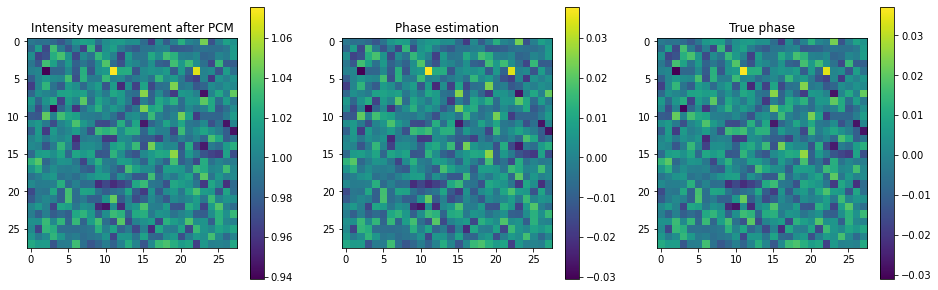

In [4]:
meas_field = op_pcm.apply(in_field)
meas_intensity = torch.abs(meas_field)**2

est_phase = (meas_intensity - 1) / 2

plt.figure(figsize=(16,5))
plt.subplot(131)
plt.imshow(meas_intensity)
plt.colorbar()
plt.title('Intensity measurement after PCM');
plt.subplot(132)
plt.imshow(est_phase)
plt.colorbar()
plt.title('Phase estimation');
plt.subplot(133)
plt.imshow(torch.angle(in_field))
plt.colorbar()
plt.title('True phase');

# External reference

In [8]:
ref_strength = 100
op_constant = 1j * LinOpConstant(value=ref_strength)

op_object = LinOpId()

op_extref = op_object + op_constant

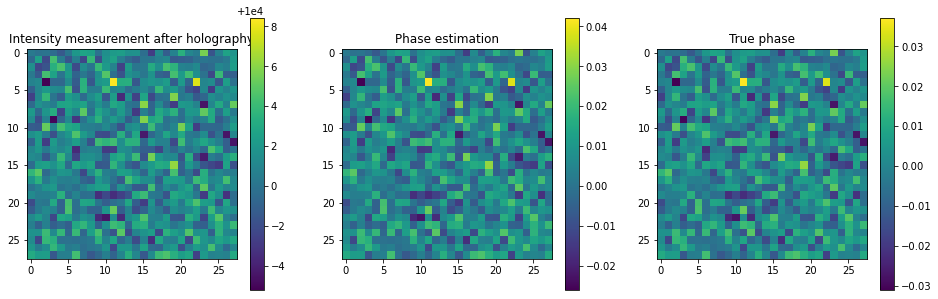

In [9]:
meas_field = op_extref.apply(in_field)
meas_intensity = torch.abs(meas_field)**2

est_phase = (meas_intensity - ref_strength**2) / 2 / ref_strength

plt.figure(figsize=(16,5))
plt.subplot(131)
plt.imshow(meas_intensity)
plt.colorbar()
plt.title('Intensity measurement after holography');
plt.subplot(132)
plt.imshow(est_phase)
plt.colorbar()
plt.title('Phase estimation');
plt.subplot(133)
plt.imshow(torch.angle(in_field))
plt.colorbar()
plt.title('True phase');